# Preprocessing

This is a Python Notebook that contains the Preprocessing for this MSc thesis.

Student ID: B721581

It is broken down into the following sections:
1. Import Libraries
2. Load Data
3. Preprocess Data

## 1. Import Libraries

In [7]:
# !pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [8]:
# read the csv file
data = pd.read_csv('data/Clean_Gym_Data.csv')

# show datset info and statistical description
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703200 entries, 0 to 4703199
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Object           int64  
 2   Day              int64  
 3   Workout          object 
 4   Sensor_Position  object 
 5   A_x              float64
 6   A_y              float64
 7   A_z              float64
 8   G_x              float64
 9   G_y              float64
 10  G_z              float64
dtypes: float64(6), int64(3), object(2)
memory usage: 394.7+ MB


,Unnamed: 0,Object,Day,A_x,A_y,A_z,G_x,G_y,G_z
count,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06,4.703200e+06
mean,2.351600e+06,5.392456e+00,2.802339e+00,5.035507e-01,4.985133e-01,4.977778e-01,4.997786e-01,4.995448e-01,5.002019e-01
std,1.357697e+06,2.845738e+00,1.441073e+00,4.246152e-02,4.969804e-02,3.060151e-02,4.460951e-02,3.632589e-02,4.586413e-02
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.175800e+06,3.000000e+00,1.000000e+00,4.965000e-01,4.931250e-01,4.945000e-01,4.931250e-01,4.945312e-01,4.929688e-01
50%,2.351600e+06,5.000000e+00,3.000000e+00,5.000000e-01,4.997500e-01,4.998750e-01,4.999625e-01,5.000000e-01,4.999625e-01
75%,3.527399e+06,8.000000e+00,4.000000e+00,5.056250e-01,5.047500e-01,5.032500e-01,5.064437e-01,5.051937e-01,5.054312e-01
max,4.703199e+06,1.000000e+01,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 3. Preprocess Data

Null class: (2606991, 11)
Walking class: (283040, 11)
Null class us: (283040, 11)


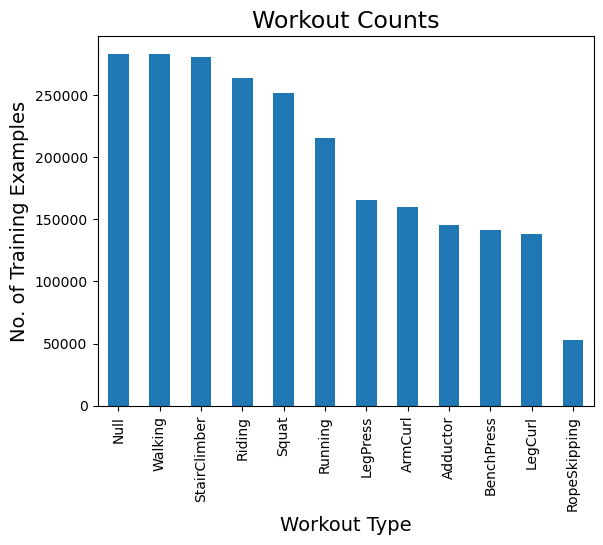

In [9]:
# get list of the relevant features for model training
features = ['A_x', 'A_y', 'A_z', 'G_x', 'G_y', 'G_z']

# get length of that list
features_no = len(features)

# undersample null class
Workout_counts = data['Workout'].value_counts()
null_data = data[data['Workout'] == 'Null']
walking_data = data[data['Workout'] == 'Walking']
print('Null class:', null_data.shape)
print('Walking class:', walking_data.shape)
null_data_us = null_data.sample(Workout_counts['Walking'])
print('Null class us:', null_data_us.shape)
data = data[data['Workout'] != 'Null']
data = pd.concat([null_data_us, data], axis = 0)

# plot undersampled null class
Workout_counts = data['Workout'].value_counts()
Workout_counts.plot(kind = 'bar', 
                    title = 'Workout Counts',
                    xlabel = 'Workout Type',
                    ylabel = 'No. of Training Examples')
plt.title('Workout Counts', fontsize=17)
plt.xlabel('Workout Type', fontsize=14)
plt.ylabel('No. of Training Examples', fontsize=14)

# save the figure
plt.savefig("us_null.png")

# show the plot
plt.show()

# save preprocessed data as a csv file
data.to_csv('data/Preprocessed_Gym_Data.csv')